Libraries import

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

CSV file load

In [8]:
df=pd.read_csv("BigBasket Products.csv")
df.head()

,index,product,category,sub_category,brand,sale_price,market_price,type,rating,description
0,1,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.0,220.0,Hair Oil & Serum,4.1,This Product contains Garlic Oil that is known...
1,2,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.0,180.0,Water & Fridge Bottles,2.3,"Each product is microwave safe (without lid), ..."
2,3,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.0,250.0,Lamp & Lamp Oil,3.4,"A perfect gift for all occasions, be it your m..."
3,4,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.0,176.0,"Laundry, Storage Baskets",3.7,Multipurpose container with an attractive desi...
4,5,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.0,162.0,Bathing Bars & Soaps,4.4,Nivea Creme Soft Soap gives your skin the best...


DATA UNDERSTANDING

In [9]:
df.shape
df.columns
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27555 entries, 0 to 27554
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         27555 non-null  int64  
 1   product       27554 non-null  object 
 2   category      27555 non-null  object 
 3   sub_category  27555 non-null  object 
 4   brand         27554 non-null  object 
 5   sale_price    27555 non-null  float64
 6   market_price  27555 non-null  float64
 7   type          27555 non-null  object 
 8   rating        18929 non-null  float64
 9   description   27440 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 2.1+ MB


,index,sale_price,market_price,rating
count,27555.00000,27555.000000,27555.000000,18929.000000
mean,13778.00000,322.514808,382.056664,3.943410
std,7954.58767,486.263116,581.730717,0.739063
min,1.00000,2.450000,3.000000,1.000000
25%,6889.50000,95.000000,100.000000,3.700000
50%,13778.00000,190.000000,220.000000,4.100000
75%,20666.50000,359.000000,425.000000,4.300000
max,27555.00000,12500.000000,12500.000000,5.000000


MISSING VALUE

In [10]:
# Missing values
df.isnull().sum()



index              0
product            1
category           0
sub_category       0
brand              1
sale_price         0
market_price       0
type               0
rating          8626
description      115
dtype: int64

DUPLICATE DATA

In [11]:
df.drop_duplicates(inplace=True)

PRICE COLUMN

In [12]:
df['market_price'] = df['market_price'].astype(str)
df['market_price'] = df['market_price'].str.replace("₹", "")
df['market_price'] = df['market_price'].astype(float)


In [13]:
category_count=df['category'].value_counts()
print(category_count)

category
Beauty & Hygiene            7867
Gourmet & World Food        4690
Kitchen, Garden & Pets      3580
Snacks & Branded Foods      2814
Foodgrains, Oil & Masala    2676
Cleaning & Household        2675
Beverages                    885
Bakery, Cakes & Dairy        851
Baby Care                    610
Fruits & Vegetables          557
Eggs, Meat & Fish            350
Name: count, dtype: int64


CATEGORY-WISE AVERAGE PRICE

In [14]:
df.groupby('category')['market_price'].mean().sort_values(ascending=False)

category
Kitchen, Garden & Pets      659.657654
Baby Care                   596.754098
Beauty & Hygiene            493.535302
Gourmet & World Food        358.420885
Eggs, Meat & Fish           325.835486
Beverages                   272.233898
Cleaning & Household        262.112280
Foodgrains, Oil & Masala    230.131913
Bakery, Cakes & Dairy       157.881316
Snacks & Branded Foods      140.775231
Fruits & Vegetables          64.433662
Name: market_price, dtype: float64

DATA VISUALIZATION

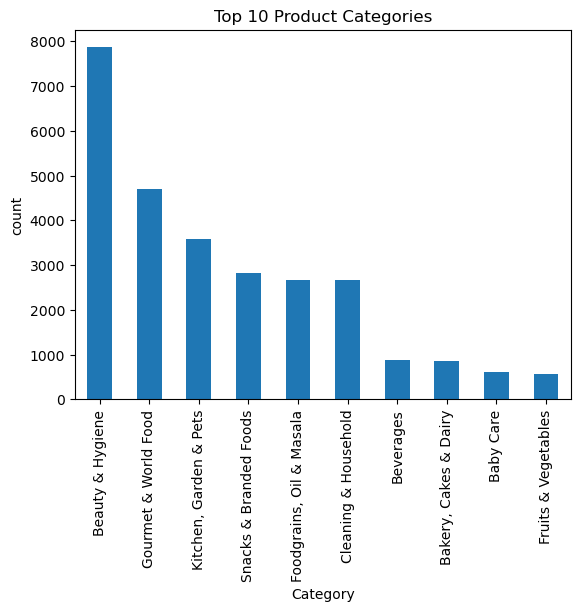

In [15]:
import matplotlib.pyplot as plt
category_count.head(10).plot(kind='bar')
plt.title("Top 10 Product Categories")
plt.xlabel("Category")
plt.ylabel("count")
plt.show()

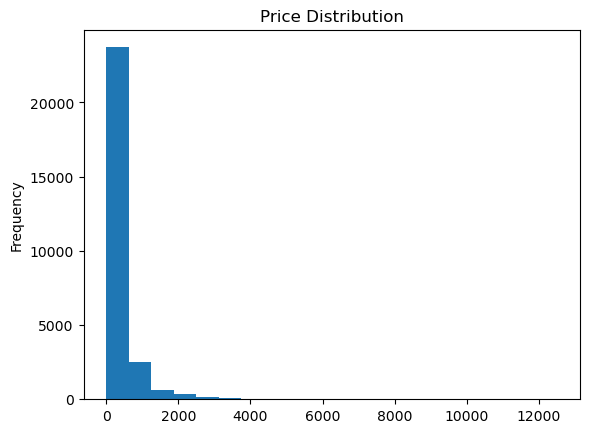

In [16]:
df["market_price"].plot(kind='hist',bins=20)
plt.title("Price Distribution")
plt.show()

Advanced EDA
Price Distribution

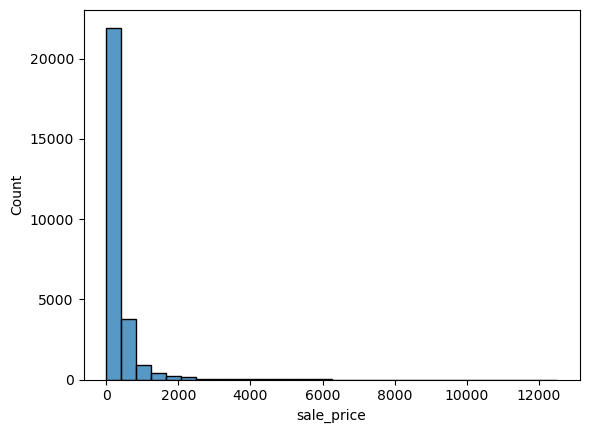

In [17]:

import seaborn as sns
sns.histplot(df['sale_price'], bins=30)
plt.show()



Category-wise Sales

In [18]:
df.groupby('category')['sale_price'].sum().sort_values(ascending=False)

category
Beauty & Hygiene            3293749.24
Kitchen, Garden & Pets      1816938.12
Gourmet & World Food        1500115.31
Cleaning & Household         605013.09
Foodgrains, Oil & Masala     516916.23
Snacks & Branded Foods       364675.08
Baby Care                    326317.17
Beverages                    212186.67
Bakery, Cakes & Dairy        121525.14
Eggs, Meat & Fish            101114.12
Fruits & Vegetables           28345.36
Name: sale_price, dtype: float64

Rating vs Price

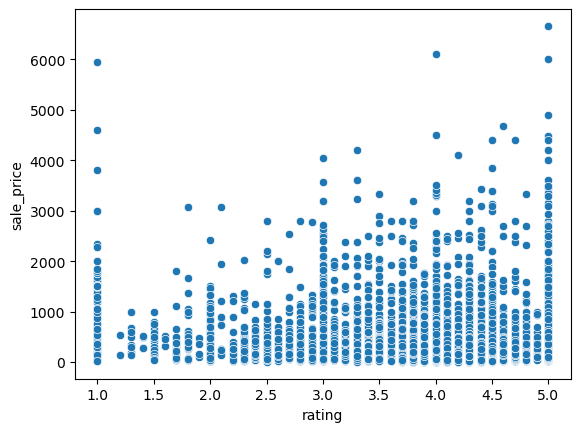

In [19]:
sns.scatterplot(x='rating',y='sale_price',data=df)
plt.show()

KPI Dashboard Data

In [26]:
df['brand'] = df['sale_price'] * df['rating']

KPIs calculate

In [27]:
total_brand=df['brand'].sum()
print(total_brand)

19583703.846


In [3]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [4]:
df = pd.read_csv("BigBasket Products.csv")
df.head()


,index,product,category,sub_category,brand,sale_price,market_price,type,rating,description
0,1,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.0,220.0,Hair Oil & Serum,4.1,This Product contains Garlic Oil that is known...
1,2,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.0,180.0,Water & Fridge Bottles,2.3,"Each product is microwave safe (without lid), ..."
2,3,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.0,250.0,Lamp & Lamp Oil,3.4,"A perfect gift for all occasions, be it your m..."
3,4,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.0,176.0,"Laundry, Storage Baskets",3.7,Multipurpose container with an attractive desi...
4,5,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.0,162.0,Bathing Bars & Soaps,4.4,Nivea Creme Soft Soap gives your skin the best...


In [27]:
ml_df = df[['market_price', 'sale_price', 'rating', 'category']]
ml_df = ml_df.dropna()
print(ml_df)


       market_price  sale_price  rating                category
0             220.0      220.00     4.1        Beauty & Hygiene
1             180.0      180.00     2.3  Kitchen, Garden & Pets
2             250.0      119.00     3.4    Cleaning & Household
3             176.0      149.00     3.7    Cleaning & Household
4             162.0      162.00     4.4        Beauty & Hygiene
...             ...         ...     ...                     ...
27550         249.0      199.20     3.9        Beauty & Hygiene
27551          75.0       67.50     4.0    Gourmet & World Food
27552         200.0      200.00     3.8    Gourmet & World Food
27553         495.0      396.00     4.2               Beverages
27554         390.0      214.53     4.5        Beauty & Hygiene

[18929 rows x 4 columns]


CATEGORICAL DATA NUMERIC

In [28]:
le=LabelEncoder()
ml_df['category']=le.fit_transform(ml_df['category'])
print(ml_df['category'])

0        2
1        7
2        4
3        4
4        2
        ..
27550    2
27551    6
27552    6
27553    3
27554    2
Name: category, Length: 18929, dtype: int64


Features (X) & Target (y)

In [30]:
x=ml_df.drop('sale_price',axis=1)
y=ml_df['sale_price']
print(x,y)

       market_price  rating  category
0             220.0     4.1         2
1             180.0     2.3         7
2             250.0     3.4         4
3             176.0     3.7         4
4             162.0     4.4         2
...             ...     ...       ...
27550         249.0     3.9         2
27551          75.0     4.0         6
27552         200.0     3.8         6
27553         495.0     4.2         3
27554         390.0     4.5         2

[18929 rows x 3 columns] 0        220.00
1        180.00
2        119.00
3        149.00
4        162.00
          ...  
27550    199.20
27551     67.50
27552    200.00
27553    396.00
27554    214.53
Name: sale_price, Length: 18929, dtype: float64


Train–Test Split

In [31]:
x_train,x_test,y_train,y_test=train_test_split(
    x,y,test_size=0.2,random_state=42
)
print(x_train,x_test,y_train,y_test)

       market_price  rating  category
25360         295.0     3.5         2
8806           35.0     4.1         3
7462          140.0     4.2         8
2474          699.0     4.0         7
15904         786.0     3.0         7
...             ...     ...       ...
16484         179.0     4.3         3
17446          89.0     4.5         5
7844          100.0     4.0         4
1262           65.0     3.7         7
23000         250.0     5.0         8

[15143 rows x 3 columns]        market_price  rating  category
2512          392.0     5.0         7
20000          54.0     4.3         4
16683          55.0     4.4         8
10098         549.0     4.2         6
5655          154.0     4.0         4
...             ...     ...       ...
26850         352.0     4.5         6
20763          90.0     4.4         1
25692         112.0     4.8         5
4260          629.0     2.0         4
3266          108.0     4.3         2

[3786 rows x 3 columns] 25360    265.50
8806      35.00
7462 

Model Build (Linear Regression)

In [35]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

Prediction

In [37]:
y_pred=model.predict(x_test)
print(y_pred)

[322.64842288  66.28658597  57.55378696 ... 111.72952276 490.70923892
 112.77863805]


Model Evaluation

In [39]:
print("MAE:",mean_absolute_error(y_test,y_pred))
print("MSE:",mean_squared_error(y_test,y_pred))
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred)))
print("R2 Score",r2_score(y_test,y_pred))

MAE: 46.22236888048107
MSE: 12066.30655127195
RMSE: 109.84674119550361
R2 Score 0.9147962585860683


Actual vs Predicted Graph

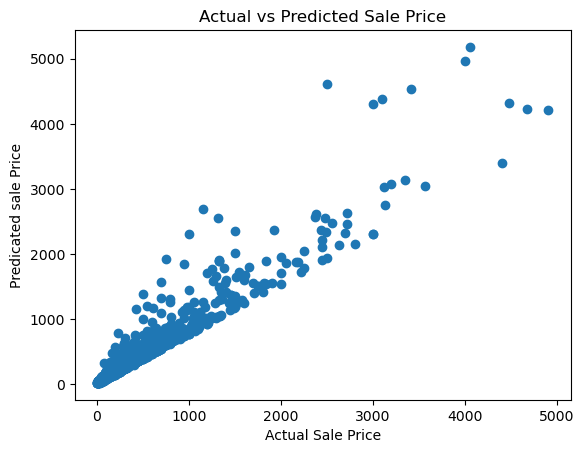

In [40]:
import matplotlib.pyplot as plt

plt.scatter(y_test,y_pred)
plt.xlabel("Actual Sale Price")
plt.ylabel("Predicated sale Price")
plt.title("Actual vs Predicted Sale Price")
plt.show()